In [1]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils
import matplotlib.pyplot as plt

In [2]:
(X_train,y_train),(X_test,y_test)=datasets.fashion_mnist.load_data()

img_rows,img_cols = X_train.shape[1:]
print(img_rows,img_cols)

28 28


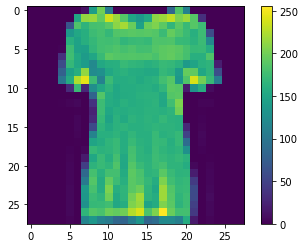

In [6]:
plt.figure()
plt.imshow(X_train[10])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
num_classes=10

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

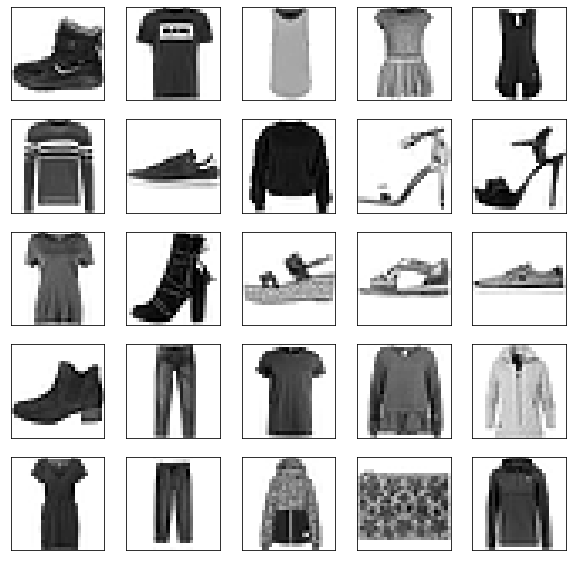

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.cm.binary)
plt.show()

In [15]:
model = models.Sequential()

In [16]:
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=(28,28,1)))
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(num_classes,activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               921700    
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [21]:
from keras import backend
if backend.image_data_format=='channels_first':
    X_train = X_train.reshape(X_train.shape[0],1,img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0],1,img_rows, img_cols)
    input_shape = (1,img_rows,img_cols)
else: # channels_last
    X_train = X_train.reshape(X_train.shape[0],img_rows, img_cols,1)
    X_test = X_test.reshape(X_test.shape[0],img_rows, img_cols,1)
    input_shape = (img_rows,img_cols,1)

In [17]:
model.compile('adam','categorical_crossentropy',metrics=['accuracy'])

Epoch 1/10
480/480 [==============================] - 71s 147ms/step - loss: 0.3075 - val_loss: 0.2669
Epoch 2/10
480/480 [==============================] - 75s 156ms/step - loss: 0.2627 - val_loss: 0.2525
Epoch 3/10
480/480 [==============================] - 72s 150ms/step - loss: 0.2253 - val_loss: 0.2419
Epoch 4/10
480/480 [==============================] - 77s 160ms/step - loss: 0.2011 - val_loss: 0.2204
Epoch 5/10
480/480 [==============================] - 81s 169ms/step - loss: 0.1772 - val_loss: 0.2198
Epoch 6/10
480/480 [==============================] - 75s 156ms/step - loss: 0.1576 - val_loss: 0.2260
Epoch 7/10
480/480 [==============================] - 71s 149ms/step - loss: 0.1392 - val_loss: 0.2141
Epoch 8/10
480/480 [==============================] - 72s 150ms/step - loss: 0.1217 - val_loss: 0.2246
Epoch 9/10
480/480 [==============================] - 74s 155ms/step - loss: 0.1066 - val_loss: 0.2329
Epoch 10/10
480/480 [==============================] - 68s 141ms/step - l

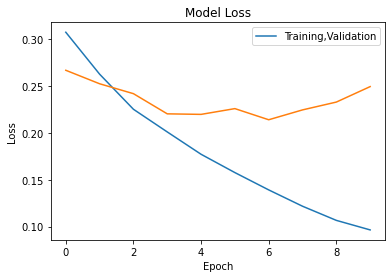

KeyError: 'accuracy'

In [25]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training,Validation'])
    plt.savefig('C:\lje/loss_plot.png',dpi=300)#경로를 tomcat경로로 바꿔주면 됨.
    plt.show()
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training,Validation'])
    plt.savefig('C:\lje/acc_plot.png',dpi=300)
    plt.show()
    
history = model.fit(X_train,y_train,epochs=10,batch_size=100,validation_split=0.2)

plot_loss(history)
plot_acc(history)

In [ ]:
print(model.evaluate(X_test,y_test, batch_size=100))

In [ ]:
model.save('C:\lje/fasion_mnist.h5')